In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#reading data
train = pd.read_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\PROJECTS\\JOBATHON 2021\\train_MpHjUjU.csv")
test = pd.read_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\PROJECTS\\JOBATHON 2021\\test_hXY9mYw.csv")
print(f"The number of rows in the train data are \033[1m{train.shape[0]}\033[0m whereas in the test data are \033[1m{test.shape[0]}\033[0m"
     f"\nThe total Number of features given in the data are {train.shape[1]}.")

The number of rows in the train data are 19104 whereas in the test data are 741
The total Number of features given in the data are 13.


In [3]:
#checking info of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [4]:
#reading first 5 rows
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [5]:
#calculating average business value per employee
business_value = train.groupby('Emp_ID').agg({'Total Business Value':'mean'})
business_value.head()

,Total Business Value
Emp_ID,
1,571860.0
2,0.0
4,70000.0
5,40120.0
6,253000.0


In [6]:
#keeping only the last reporting day of each employee
train = train.sort_values(by=["Emp_ID", "MMM-YY"])
train = train.drop_duplicates(subset=['Emp_ID'], keep='last')

In [7]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,0,2


In [8]:
#merging train with aggregate business values and quarterly rating
train=train.drop(['Total Business Value'],axis=1)
train=train.merge(business_value,on='Emp_ID')
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,Total Business Value
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,2,571860.0
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,1,0.0
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,1,70000.0
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,1,40120.0
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,2,253000.0


In [9]:
#calculating difference between joining designation and designation
train['designation_diff']=train['Designation'] - train['Joining Designation']

In [10]:
#dropping joining designation and designation
train = train.drop(['Joining Designation','Designation'],axis=1)

In [11]:
import datetime as dt

In [12]:
#converting date of joining and last working day to datetime
train['Dateofjoining']= pd.to_datetime(train['Dateofjoining'])
train['LastWorkingDate']= pd.to_datetime(train['LastWorkingDate'])

In [13]:
#calculating tenure for each employee in days
train['tenure']=train['LastWorkingDate']-train['Dateofjoining']

In [14]:
train['tenure']= train['tenure'].dt.days

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                2381 non-null   object        
 1   Emp_ID                2381 non-null   int64         
 2   Age                   2381 non-null   int64         
 3   Gender                2381 non-null   object        
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   object        
 6   Salary                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Quarterly Rating      2381 non-null   int64         
 10  Total Business Value  2381 non-null   float64       
 11  designation_diff      2381 non-null   int64         
 12  tenure                1616 non-null   float64       
dtypes: datetime64[ns](

In [16]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Quarterly Rating,Total Business Value,designation_diff,tenure
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,2,571860.0,0,78.0
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,1,0.0,0,NaN
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,1,70000.0,0,141.0
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,40120.0,0,58.0
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,2,253000.0,0,NaN


In [17]:
#replacing Nat in tenure with -1
train['tenure']=train['tenure'].fillna(-1)

In [18]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Quarterly Rating,Total Business Value,designation_diff,tenure
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,2,571860.0,0,78.0
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,1,0.0,0,-1.0
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,1,70000.0,0,141.0
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,40120.0,0,58.0
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,2,253000.0,0,-1.0


In [19]:
#Identifying employees who have left in 180 or less days
train['attr'] = train['tenure'].apply(lambda x: 1 if (x<=220 and x>0) else 0)

In [20]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Quarterly Rating,Total Business Value,designation_diff,tenure,attr
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,2,571860.0,0,78.0,1
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,1,0.0,0,-1.0,0
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,1,70000.0,0,141.0,1
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,40120.0,0,58.0,1
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,2,253000.0,0,-1.0,0


In [21]:
#dropping columns which are not required
train=train.drop(['MMM-YY','Dateofjoining','LastWorkingDate'], axis=1)

In [22]:
#converting gender to categorical data type
train['Gender']=train['Gender'].astype('category')
train['Gender']=train['Gender'].cat.codes

In [23]:
train.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Quarterly Rating,Total Business Value,designation_diff,tenure,attr
0,1,28,1,C23,Master,57387,2,571860.0,0,78.0,1
1,2,31,1,C7,Master,67016,1,0.0,0,-1.0,0
2,4,43,1,C13,Master,65603,1,70000.0,0,141.0,1
3,5,29,1,C9,College,46368,1,40120.0,0,58.0,1
4,6,31,0,C11,Bachelor,78728,2,253000.0,0,-1.0,0


<AxesSubplot:>

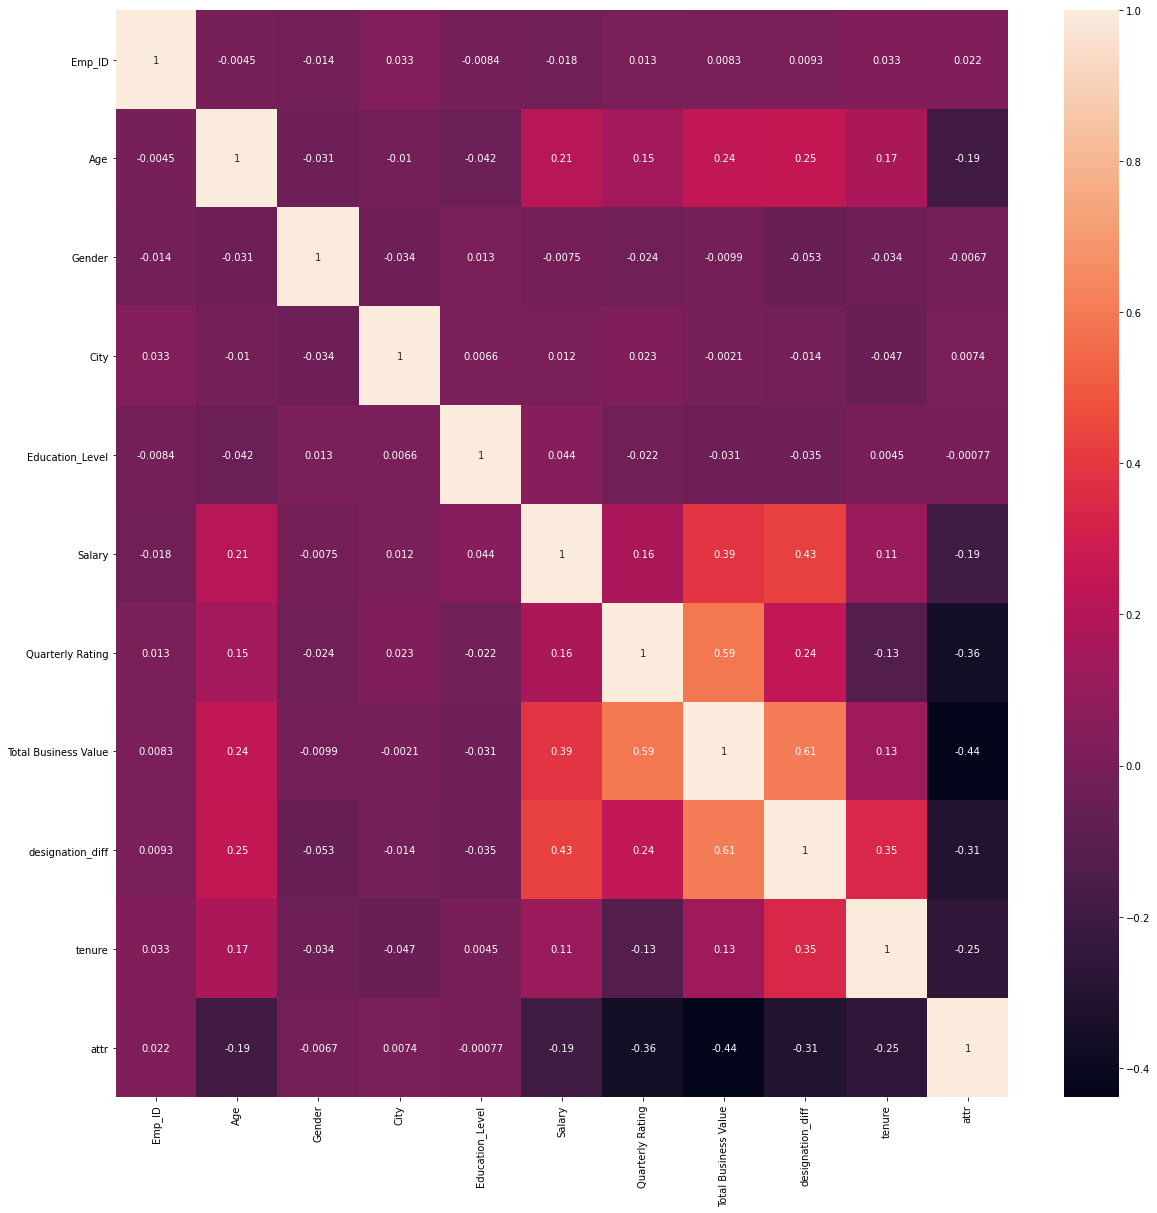

In [24]:
train_temp=train.copy()
train_temp['City']=train_temp['City'].astype('category')
train_temp['City']=train_temp['City'].cat.codes
train_temp['Education_Level']=train_temp['Education_Level'].astype('category')
train_temp['Education_Level']=train_temp['Education_Level'].cat.codes
plt.figure(figsize = (20,20))
sns.heatmap(train_temp.corr(), annot=True)

In [25]:
#encoding categorical variables
train = pd.get_dummies(train, columns=['City', 'Education_Level'])

In [26]:
train.head()

,Emp_ID,Age,Gender,Salary,Quarterly Rating,Total Business Value,designation_diff,tenure,attr,City_C1,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,1,28,1,57387,2,571860.0,0,78.0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,31,1,67016,1,0.0,0,-1.0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,4,43,1,65603,1,70000.0,0,141.0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,5,29,1,46368,1,40120.0,0,58.0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,6,31,0,78728,2,253000.0,0,-1.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
#removing tenure 
train=train.drop('tenure',axis=1)

In [28]:
#completing the test dataset
test = test.merge(train, on='Emp_ID')
test = test.drop('attr',axis=1)

In [29]:
test.head()

,Emp_ID,Age,Gender,Salary,Quarterly Rating,Total Business Value,designation_diff,City_C1,City_C10,City_C11,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,394,34,0,97722,3,1.144092e+06,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,173,39,1,56174,3,8.277621e+05,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1090,39,1,96750,2,2.099270e+06,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,840,40,0,88813,2,7.139183e+05,3,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,308,32,1,188418,2,2.417687e+06,3,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [30]:
#dropping EMP_ID from train
train=train.drop('Emp_ID',axis=1)
train.head()

,Age,Gender,Salary,Quarterly Rating,Total Business Value,designation_diff,attr,City_C1,City_C10,City_C11,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,28,1,57387,2,571860.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,31,1,67016,1,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,43,1,65603,1,70000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,29,1,46368,1,40120.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,31,0,78728,2,253000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [31]:
#defining x and y
x = train.drop('attr',axis=1)
y = train['attr']

In [32]:
#splitting train data
x_train,x_eval,y_train,y_eval = train_test_split(x,y,test_size=0.3,shuffle=True)

In [33]:
#applying minmax scaling 
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_eval=scaler.transform(x_eval)

In [34]:
#building model
model=RandomForestClassifier(random_state=10)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [35]:
model.score(x_eval,y_eval)

0.7664335664335664

In [36]:
from sklearn import metrics
metrics.f1_score(y_eval,model.predict(x_eval))

0.6958105646630237

In [37]:
model.predict(x_eval)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [38]:
test.head()

,Emp_ID,Age,Gender,Salary,Quarterly Rating,Total Business Value,designation_diff,City_C1,City_C10,City_C11,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,394,34,0,97722,3,1.144092e+06,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,173,39,1,56174,3,8.277621e+05,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1090,39,1,96750,2,2.099270e+06,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,840,40,0,88813,2,7.139183e+05,3,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,308,32,1,188418,2,2.417687e+06,3,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [39]:
#creating new test dataset by dropping EMP_ID
test_new=test.drop('Emp_ID',axis=1)

In [40]:
#applying scaling on test data
test_new=scaler.transform(test_new)

In [41]:
#predicting target for test data
test_pred = model.predict(test_new)

# Hyperparameter Tuning

In [42]:
#printing the parameters in use
print('Parameters currently in use:\n')
print(model.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}


### Random Search Cross Validation

In [43]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [45]:
#printing the best parameter combination
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [46]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [50]:
#evaluating performance
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_train, y_train)

Model Performance
Average Error: 0.1561 degrees.
Accuracy = -inf%.


In [51]:
best_random.score(x_eval,y_eval)

0.793006993006993

In [52]:
#f1 score
metrics.f1_score(y_eval,best_random.predict(x_eval))

0.7439446366782008

In [53]:
#predicting target for test file
test_pred = best_random.predict(test_new)

In [54]:
output = pd.DataFrame({'Emp_ID':test['Emp_ID'],'Target':test_pred})
output.to_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\PROJECTS\\JOBATHON 2021\\JOBATHON 2021.csv",index=False)

In [55]:
output.to_csv("C:\\Users\\Rohan\\Desktop\\AV Assignments\\PROJECTS\\JOBATHON 2021\\test_hXY9mYw.csv",index=False)